In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ujson as json
from sklearn.decomposition import PCA

import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from tqdm.auto import tqdm
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(10,8)})

In [9]:
# load ResNet activations
data_dir = r'C:\Users\Rodney\PycharmProjects\Thesis_cur-AI-tor\notebooks\micro_dataset1_resnet18_output_identity.json'
with open(data_dir, 'r') as f:
    data_dict_list = json.load(f)

data_dict = {}
for element in data_dict_list:
    data_dict.update(element)

df_x = pd.DataFrame.from_dict(data_dict, orient='index')
# df_x.head()
X = df_x.values

In [17]:
clusterable_embedding = umap.UMAP(
    n_neighbors=240,
    min_dist=0.0,
    n_components=4,
    random_state=3,
).fit_transform(X)

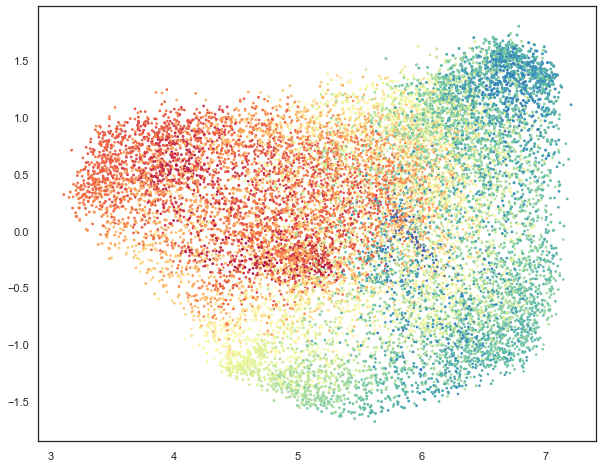

In [18]:
plt.scatter(clusterable_embedding[:, 0],
            clusterable_embedding[:, 1],
            clusterable_embedding[:, 2],
            c=clusterable_embedding[:, 3],
            # s=0.1,
            cmap='Spectral')

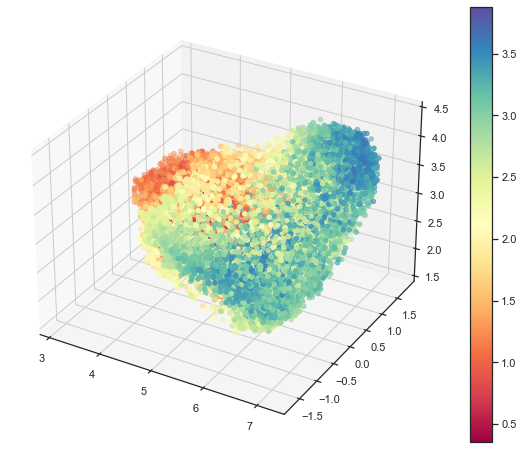

In [19]:
a = clusterable_embedding[:, 0]
b = clusterable_embedding[:, 1]
c = clusterable_embedding[:, 2]
d = clusterable_embedding[:, 3]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(a, b, c, c=d, cmap='Spectral')
fig.colorbar(img)
plt.show()

In [22]:
standard_embedding = umap.UMAP(random_state=3).fit_transform(X)

In [26]:
# Clustering

clusterable_embedding = umap.UMAP(
    n_neighbors=500,
    min_dist=0.0,
    n_components=100,
    random_state=3,
).fit_transform(X)

labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=1000,
).fit_predict(clusterable_embedding)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


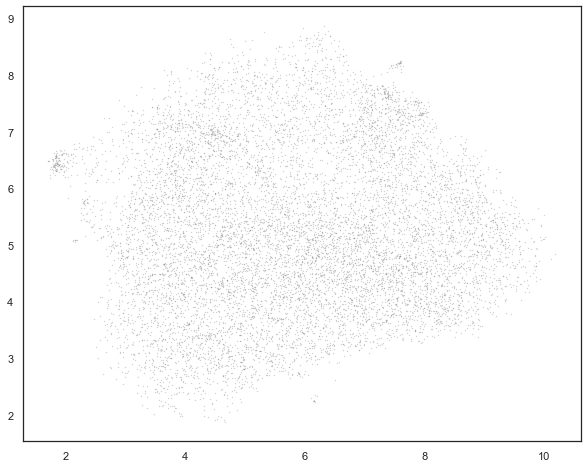

In [29]:
clustered = (labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)

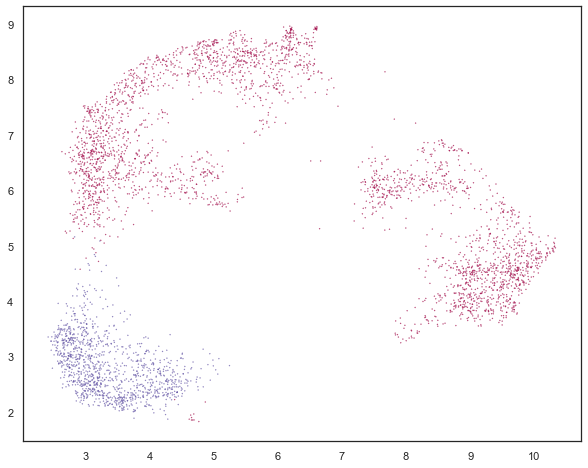

In [30]:
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral');

In [ ]:
np.sum(clustered) / X.shape[0]

In [15]:
# n_neighbors_l = [60, 120, 240, 480, 960]
n_neighbors_l = [360, 480, 720]
# n_components_l = [10, 20, 40, 80, 160]
n_components_l = [50, 25]
min_samples_l = [1, 5]
# min_cluster_size_l = [500, 750, 1000, 1250, 1500]
min_cluster_size_l = [500, 1000]

ls = [n_neighbors_l, n_components_l, min_samples_l, min_cluster_size_l]

import itertools
for element in itertools.product(*ls):
    print(element)

(360, 50, 1, 500)
(360, 50, 1, 1000)
(360, 50, 5, 500)
(360, 50, 5, 1000)
(360, 25, 1, 500)
(360, 25, 1, 1000)
(360, 25, 5, 500)
(360, 25, 5, 1000)
(480, 50, 1, 500)
(480, 50, 1, 1000)
(480, 50, 5, 500)
(480, 50, 5, 1000)
(480, 25, 1, 500)
(480, 25, 1, 1000)
(480, 25, 5, 500)
(480, 25, 5, 1000)
(720, 50, 1, 500)
(720, 50, 1, 1000)
(720, 50, 5, 500)
(720, 50, 5, 1000)
(720, 25, 1, 500)
(720, 25, 1, 1000)
(720, 25, 5, 500)
(720, 25, 5, 1000)


In [16]:
results = {}
# Hyperparameter search
hparams_list = list(itertools.product(*ls))
for hparams in tqdm(hparams_list):

    clusterable_embedding = umap.UMAP(
        n_neighbors=hparams[0],
        min_dist=0.0,
        n_components=hparams[1],
        random_state=3,
    ).fit_transform(X)

    labels = hdbscan.HDBSCAN(
        min_samples=hparams[2],
        min_cluster_size=hparams[3],
    ).fit_predict(clusterable_embedding)

    clustered = (labels >= 0)

    d = {hparams: {
         'embedding':clusterable_embedding,
         'metric': np.sum(clustered) / X.shape[0]}}
    results.update(d)
    print(f'hparams: {hparams}, metric: {np.sum(clustered) / X.shape[0]}')

  0%|          | 0/24 [00:00<?, ?it/s]

hparams: (360, 50, 1, 500), metric: 0.39131577218682256
hparams: (360, 50, 1, 1000), metric: 0.4072784602246601
hparams: (360, 50, 5, 500), metric: 0.36668199435065363
hparams: (360, 50, 5, 1000), metric: 0.3688497668002365
hparams: (360, 25, 1, 500), metric: 0.35919332588845826
hparams: (360, 25, 1, 1000), metric: 0.33909216317414437
hparams: (360, 25, 5, 500), metric: 0.31275044340800107
hparams: (360, 25, 5, 1000), metric: 0.3487486040859226


KeyboardInterrupt: 

In [14]:
# # 372
# for k in results.keys():
#     print(results[k]['metric'])

In [21]:
# n_neighbors_l = [360, 480, 720]
n_neighbors_l = [720, 1440]
n_components_l = [100]
ls = [n_neighbors_l, n_components_l]
umap_params = list(itertools.product(*ls))
umap_params

[(720, 100), (1440, 100)]

In [22]:
# Generate UMAP embeddings
embedding_list = []
for hparams in tqdm(umap_params):
    clusterable_embedding = umap.UMAP(
        n_neighbors=hparams[0],
        min_dist=0.0,
        n_components=hparams[1],
        random_state=3,
    ).fit_transform(X)
    embedding_list.append(clusterable_embedding)

  0%|          | 0/2 [00:00<?, ?it/s]

In [23]:
min_samples_l = [1, 10, 20]
min_cluster_size_l = [500]
ls = [min_samples_l, min_cluster_size_l]
hdbscan_params = list(itertools.product(*ls))
hdbscan_params

[(1, 500), (10, 500), (20, 500)]

In [24]:
results = {}
for i, clusterable_embedding in tqdm(enumerate(embedding_list)):
    for hparams in tqdm(hdbscan_params, leave=False):
        labels = hdbscan.HDBSCAN(
            min_samples=hparams[0],
            min_cluster_size=hparams[1],
        ).fit_predict(clusterable_embedding)

        clustered = (labels >= 0)

        d = {hparams: {
            'embedding':(i, clusterable_embedding),
            'metric': np.sum(clustered) / X.shape[0]}}
        results.update(d)
        print(f'hparams: {hparams}, metric: {np.sum(clustered) / X.shape[0]}')


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

hparams: (1, 500), metric: 0.3783091374893254
hparams: (10, 500), metric: 0.3029626223477633
hparams: (20, 500), metric: 0.30453918412927805


  0%|          | 0/3 [00:00<?, ?it/s]

hparams: (1, 500), metric: 0.419759574328319
hparams: (10, 500), metric: 0.24469552650594495
hparams: (20, 500), metric: 0.2775405636208369


In [28]:

clusterable_embedding = umap.UMAP(
    n_neighbors=1440,
    min_dist=0.0,
    n_components=10,
    random_state=3,
).fit_transform(X)


clustered = (labels >= 0)

In [29]:
np.sum(clustered) / X.shape[0]


0.9637390790251593

AttributeError: 'numpy.ndarray' object has no attribute 'condensed_tree_'

In [32]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10,
                            prediction_data=True).fit(clusterable_embedding)

In [33]:
soft_clusters = hdbscan.all_points_membership_vectors(clusterer)


In [34]:
soft_clusters[:10]


array([[0.04870167, 0.0298621 , 0.03355843, 0.02642275, 0.0307501 ,
        0.02322434, 0.01731235, 0.05345061, 0.01787646, 0.02111957,
        0.01899191, 0.04174206, 0.04411404, 0.02845495, 0.02088533,
        0.01553872, 0.01678421, 0.02557544, 0.01773093, 0.0183384 ,
        0.02851176, 0.01782374, 0.01677544, 0.0254865 , 0.02630219],
       [0.04608149, 0.03238192, 0.04763457, 0.02521302, 0.03040047,
        0.02802131, 0.02162685, 0.03226578, 0.02340417, 0.03284324,
        0.02718884, 0.02636101, 0.02562615, 0.19511395, 0.11218065,
        0.01868191, 0.01955125, 0.03557272, 0.02185018, 0.01961317,
        0.02256729, 0.02068533, 0.01971514, 0.02948073, 0.02214234],
       [0.02215626, 0.02205306, 0.01678609, 0.01923675, 0.0297864 ,
        0.01687845, 0.01774056, 0.01973639, 0.01754749, 0.01799435,
        0.01911301, 0.02384165, 0.02811674, 0.01500915, 0.01205346,
        0.01472007, 0.02101955, 0.01984822, 0.02021449, 0.02220403,
        0.04200583, 0.03566395, 0.02553097, 0.

In [35]:
class_labels = [preds.argmax() for preds in soft_clusters]

In [41]:
df_x_ = df_x.copy()
df_x_['class'] = class_labels
df_x_ = df_x_[['class']]
df_x_.head()

,class
3865991_3865991_691412_2935874-DSMUXGTJ-7.jpg,7
7980766_7980766_669333_7048178-XOYQRJZQ-7.jpg,13
3749936_3749936_314728_2819820-JDANXKLD-7.jpg,24
5610715_5610715_91068_4680525-LMQNOWJA-7.jpg,6
6771765_6771765_786228_5841405-PSPFNCAV-7.jpg,16


In [42]:
df_x_.to_csv('saatchi_micro_umap_hdbscan_clustering_test.csv')
